In [1]:
import scanpy as sc
import scvi
import warnings
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings
sc.set_figure_params(figsize=(4, 4))
from functions import *
import matplotlib.pyplot as plt
%matplotlib inline  

/local/data/scvi-tools/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/local/data/scvi-tools/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/local/data/anaconda3/envs/BT/lib/python3.11/site-packages/numba/np/ufunc/dufunc.py:84: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  dispatcher = jit(_target='npyufunc',
/local/data/anaconda3/envs/BT/lib/python3.11/site-pac

In [2]:
adata = scvi.data.spleen_lymph_cite_seq(save_path='data/', protein_join='inner', remove_outliers=True)
adata.layers["counts"] = adata.X.copy()
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=1200,
    subset=True,
    layer="counts",
    flavor="seurat_v3",
    batch_key="batch_indices",
)

INFO     File data/sln_111.h5ad already downloaded                                                                 
INFO     File data/sln_208.h5ad already downloaded                                                                 


In [3]:
def umapVisualization(model, adata, title, cell_types = ["cell_types"], batches = ["batch_indices"]):
    warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
    adata.obsm["X_scVI"] = model.get_latent_representation()
    sc.pp.neighbors(adata, use_rep="X_scVI")
    sc.tl.umap(adata, min_dist=0.3)
    sc.pl.umap(
        adata,
        color=cell_types,
        frameon=False,
        title= title
    )
    sc.pl.umap(
        adata,
        color=batches,
        ncols=2,
        frameon=False,
    )

In [4]:
scvi.model.SCVI.setup_anndata(
    adata,
    layer="counts",
    categorical_covariate_keys=["batch_indices"]
)

INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.


In [5]:
adata

AnnData object with n_obs × n_vars = 30474 × 1200
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch', '_scvi_batch', '_scvi_labels'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'hvg', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'isotypes_htos', 'protein_expression', '_scvi_extra_categorical_covs'
    layers: 'counts'

In [6]:
modelSD = trainModelVisualization(adata, "sdnormal", max_epochs= 200)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 200/200: 100%|██████████| 200/200 [07:48<00:00,  2.42s/it, v_num=1, train_loss_step=276, train_loss_epoch=267]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████| 200/200 [07:48<00:00,  2.34s/it, v_num=1, train_loss_step=276, train_loss_epoch=267]


In [8]:
plotAllHistory(modelSD)
umapVisualization(modelSD, adata,"SD")
plt.show()

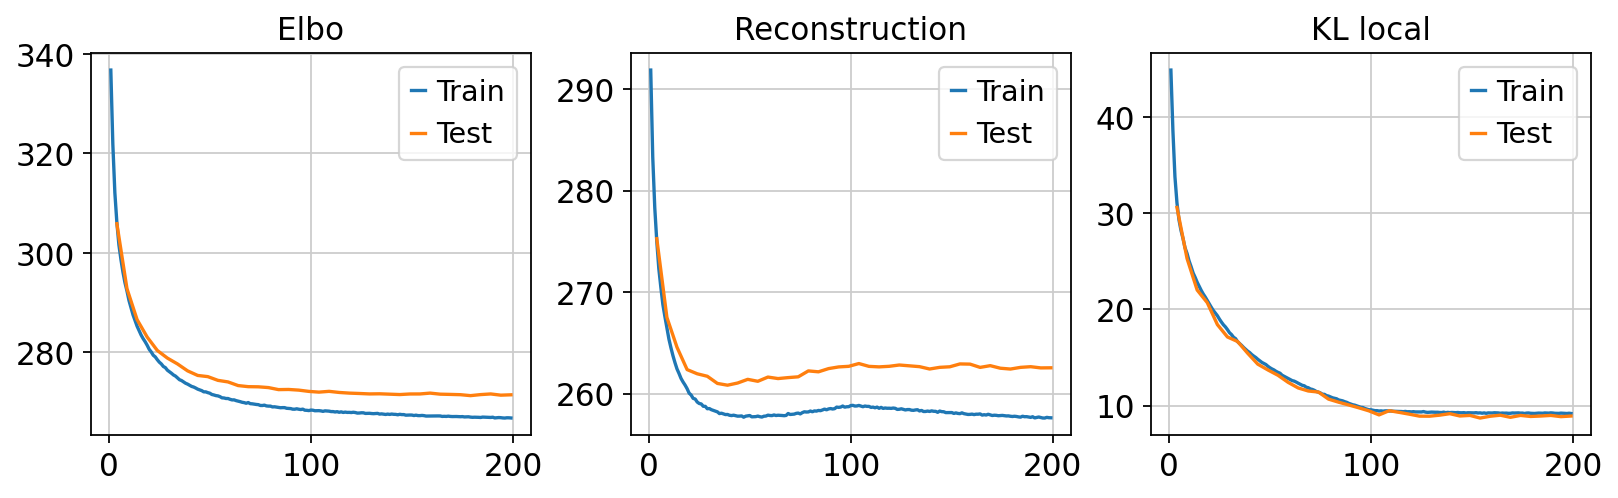

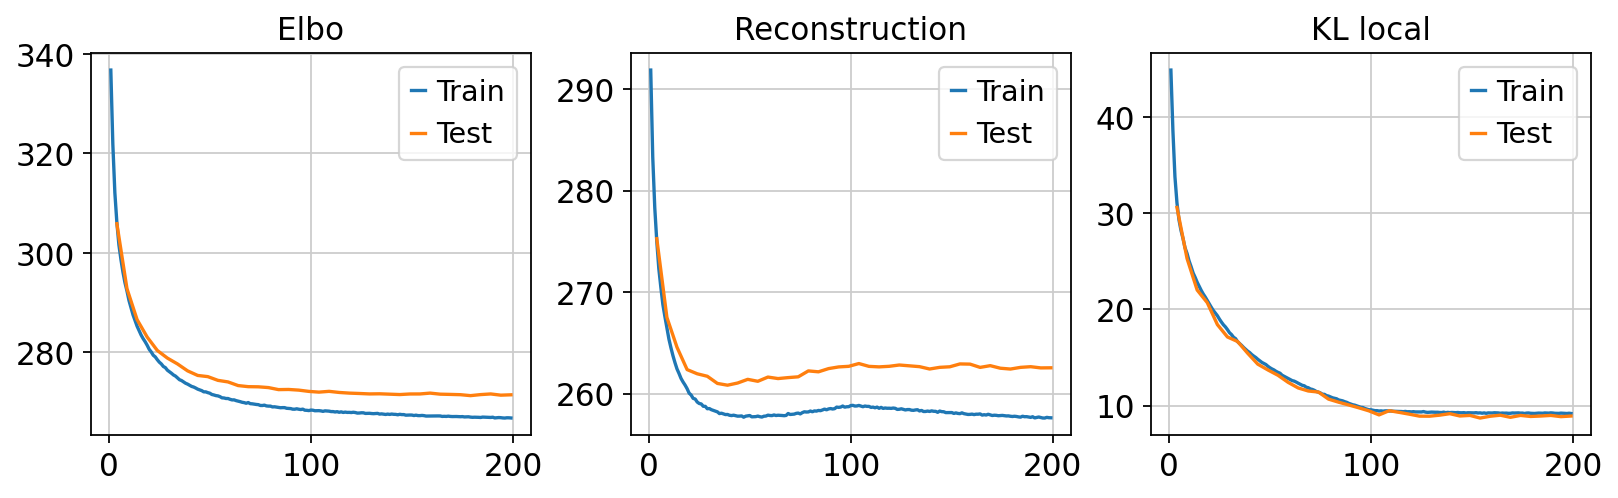

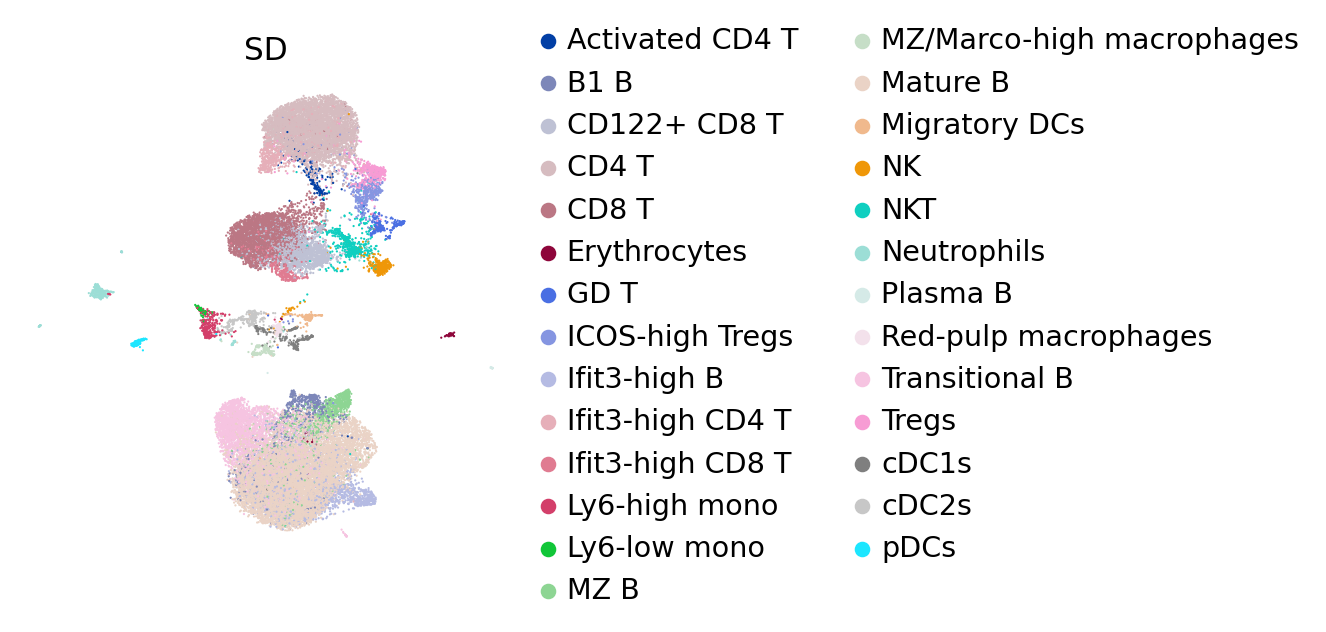

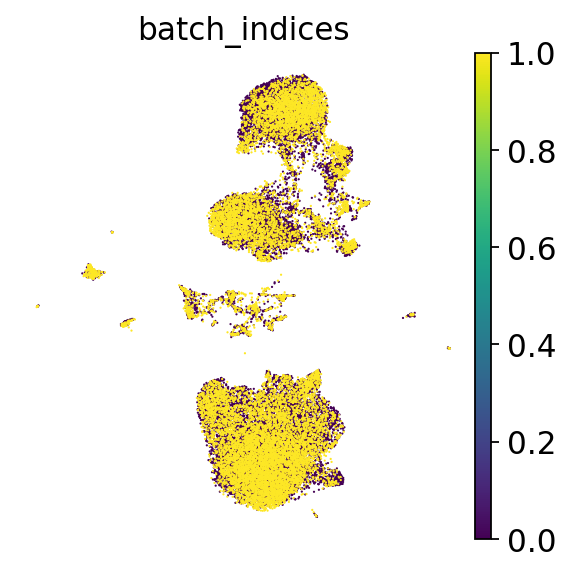

In [15]:
plt.plot()
plt.show()

In [16]:
modelMG = trainModelVisualization(adata, "mixofgaus", max_epochs = 200)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 1/200:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 141/200:  70%|███████   | 140/200 [19:34<47:00, 47.00s/it, v_num=1, train_loss_step=294, train_loss_epoch=266]  

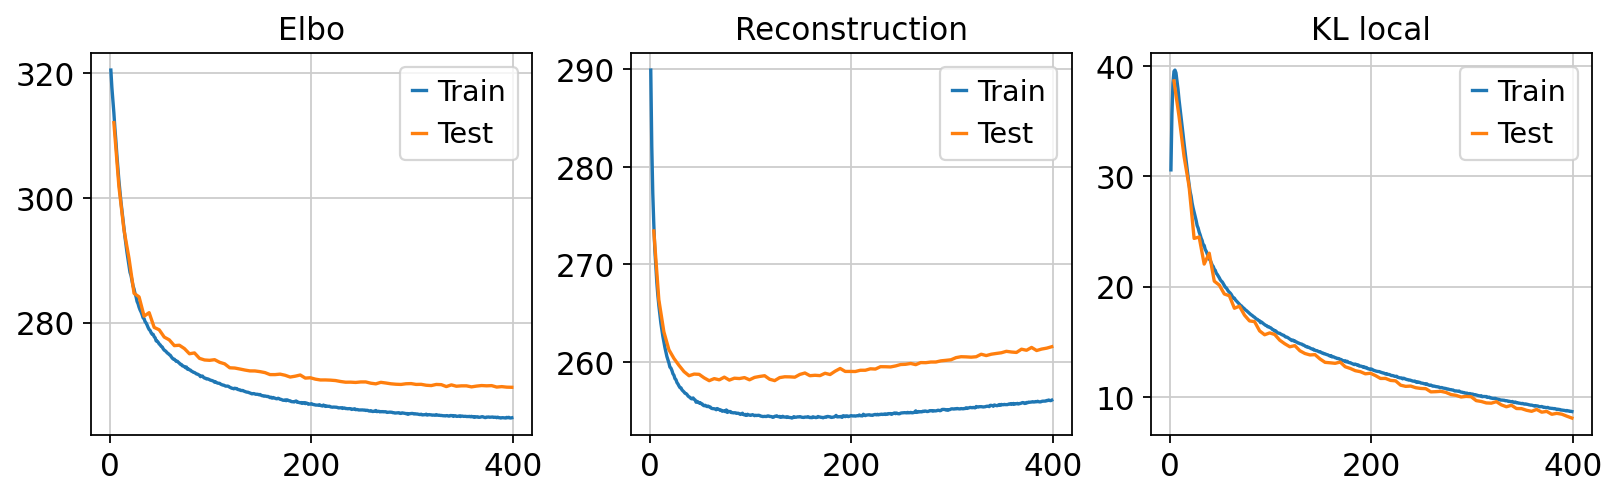

/local/data/anaconda3/envs/BT/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


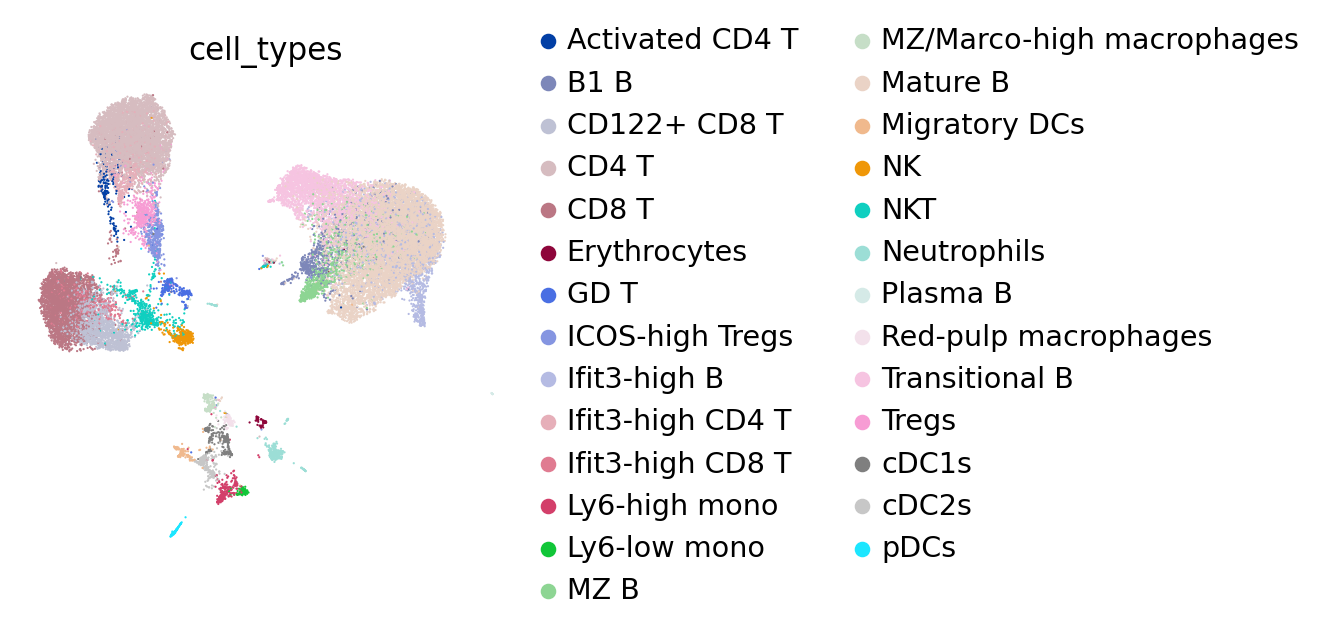

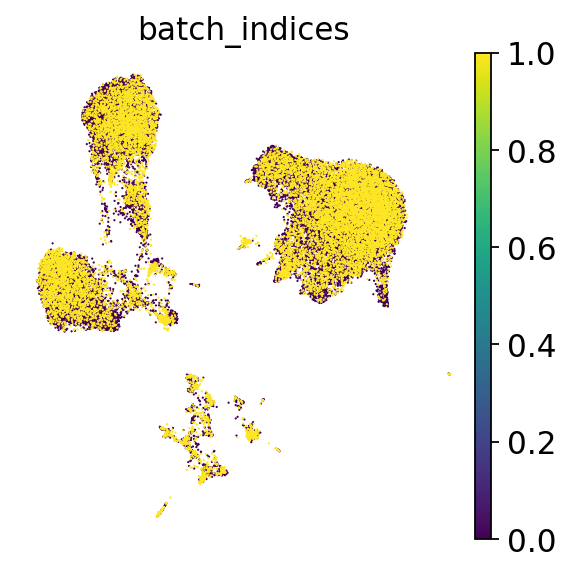

In [ ]:
plotAllHistory(modelMG)
umapVisualization(modelMG, adata,"MG")
plt.show()

In [ ]:
modelVP = trainModelVisualization(adata, "vamp", max_epochs = 200)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [12:01<00:00,  1.79s/it, v_num=1, train_loss_step=279, train_loss_epoch=265]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [12:01<00:00,  1.80s/it, v_num=1, train_loss_step=279, train_loss_epoch=265]


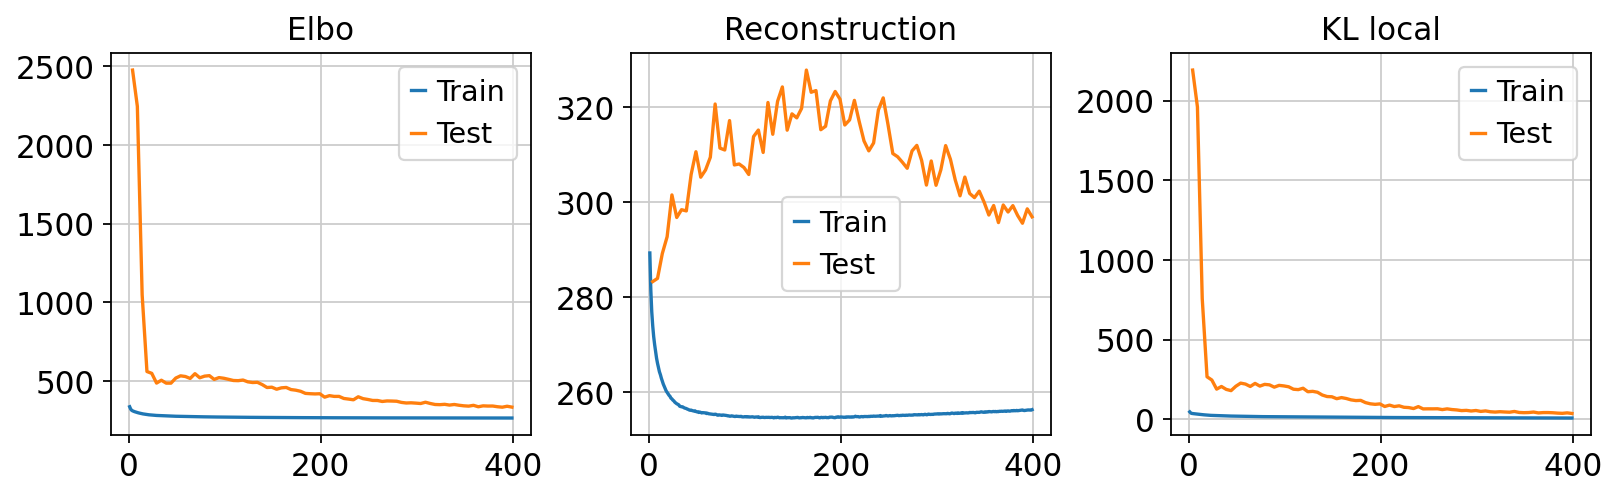

/local/data/anaconda3/envs/BT/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


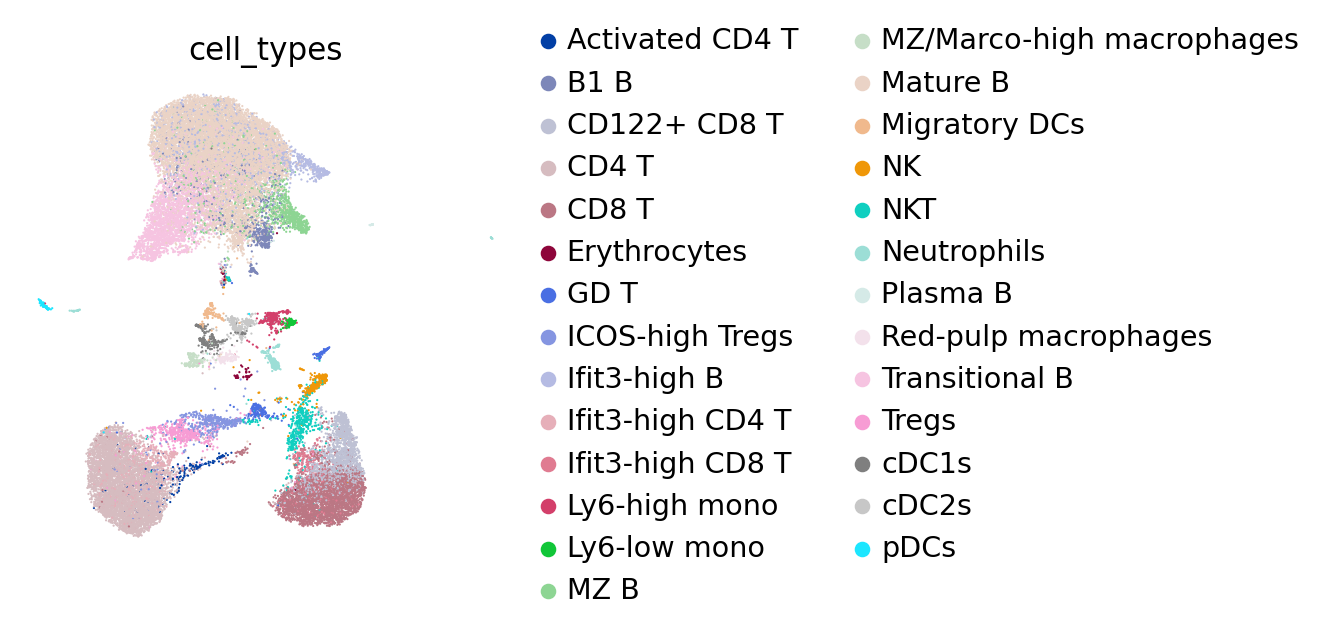

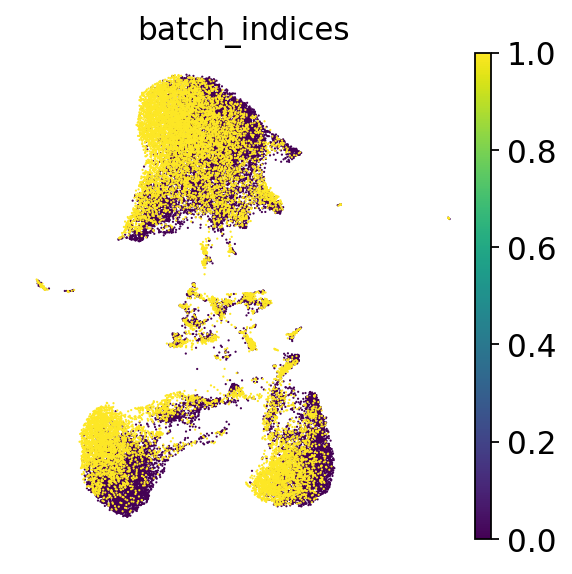

In [ ]:
plotAllHistory(modelVP)
umapVisualization(modelVP, adata,"VP")
plt.show()

In [6]:
modelNF = trainModelVisualization(adata, "normalflow", max_epochs = 100,prior_kwargs={"num_layers":8})

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 100/100: 100%|██████████| 100/100 [05:33<00:00,  3.33s/it, v_num=1, train_loss_step=240, train_loss_epoch=266]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [05:33<00:00,  3.33s/it, v_num=1, train_loss_step=240, train_loss_epoch=266]


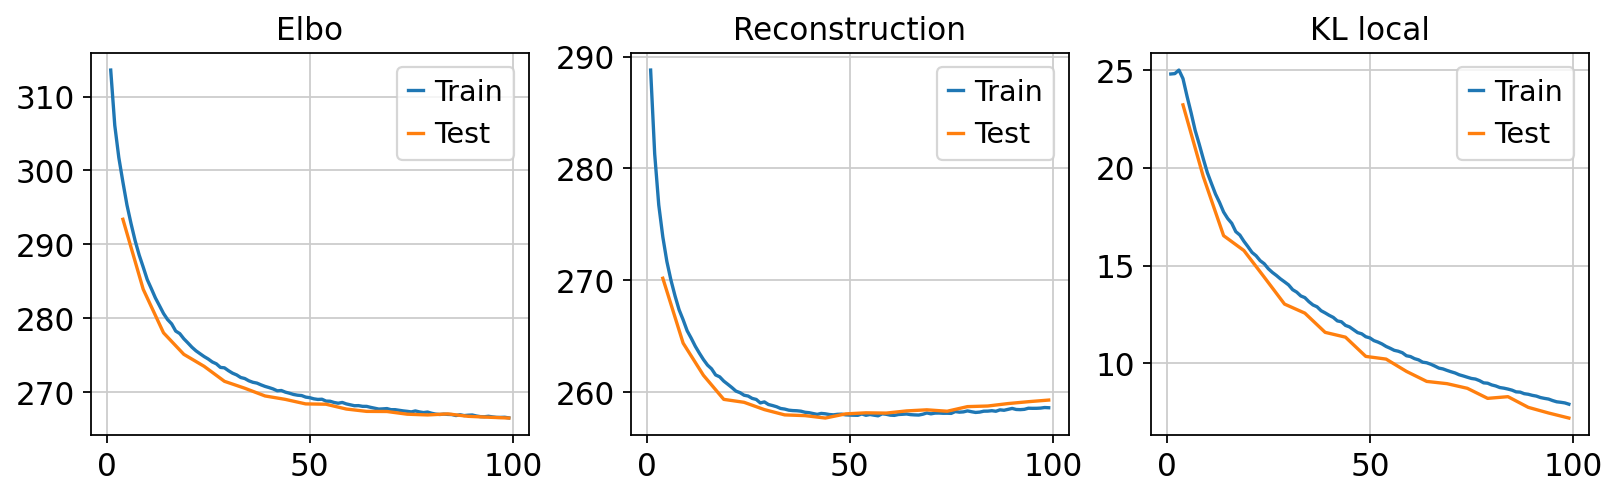

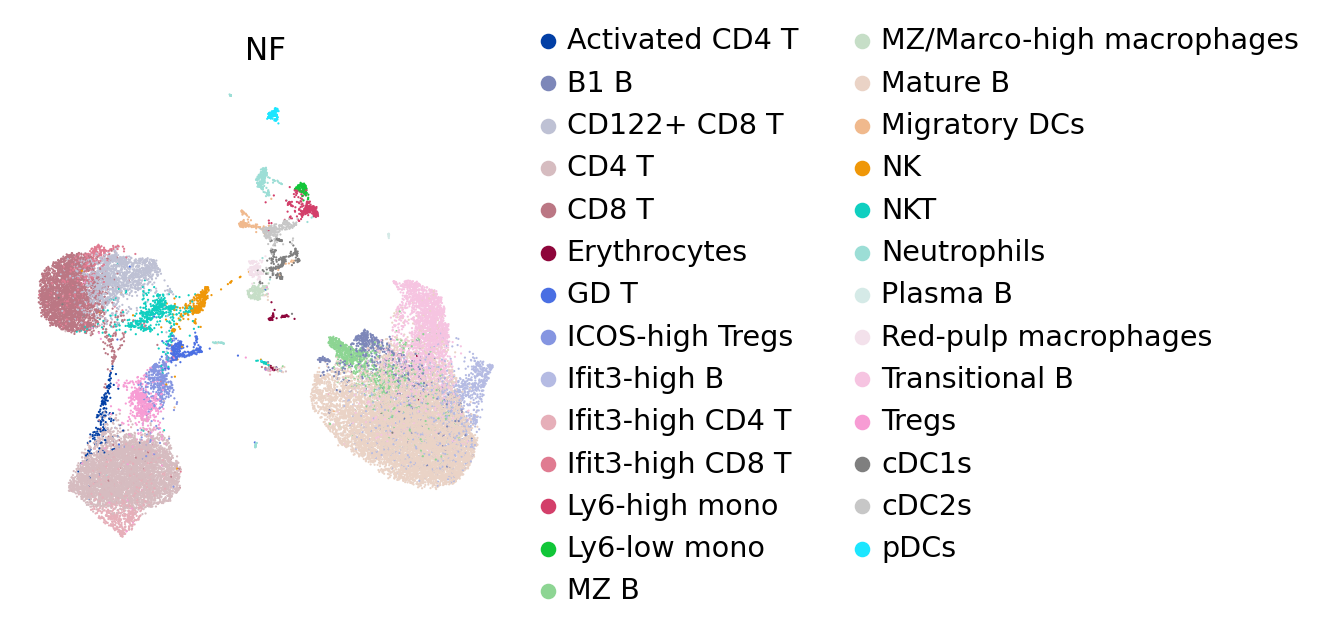

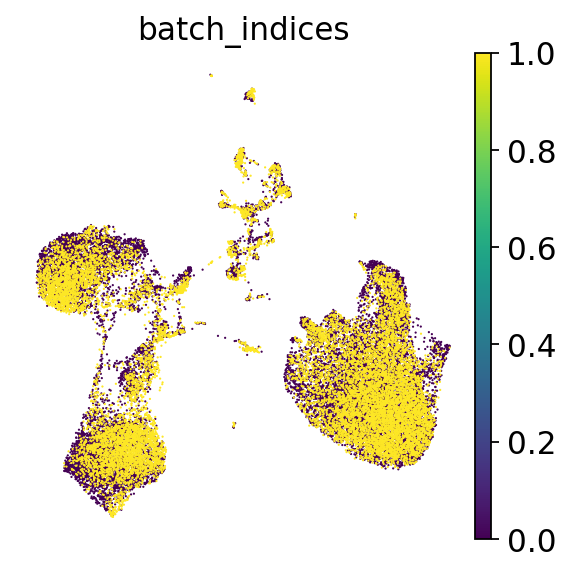

In [7]:
plotAllHistory(modelNF)
umapVisualization(modelNF, adata,"NF")
plt.show()